<a href="https://colab.research.google.com/github/dickleung0301/Mnist_digit_recognizer/blob/main/digit_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
(x_train, y_train), (x_val, y_val) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


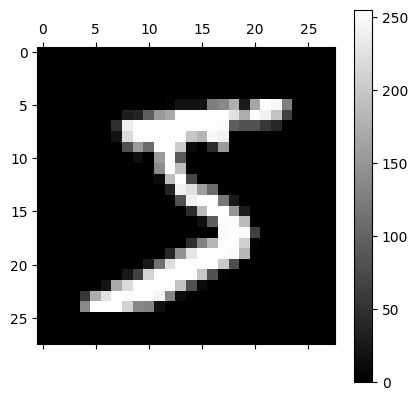

In [4]:
plt.matshow(x_train[0],cmap='gray') # to display a matrix(heat map)
plt.colorbar()
plt.show()

In [5]:
print(y_train[0])

5


###Data processing and normalisation###
* A 2D CNN will receive 4D inputs (#data, height, width, color channels)  4+D tensor with shape: batch_shape + (channels, rows, cols) if
    data_format='channels_first'
* And also normalise it from [0,255] to [0,1]

In [6]:
# adding color channel
x_train = x_train.reshape((60000,28,28,1))
x_val = x_val.reshape((10000,28,28,1))
# normalisation
x_train = x_train / 255
x_val = x_val / 255

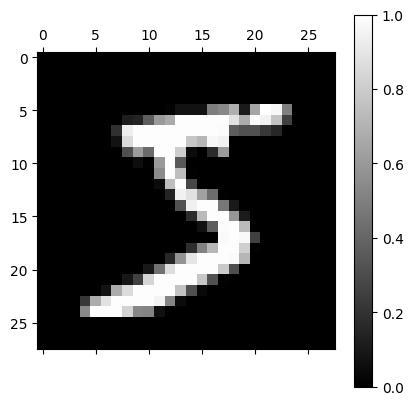

In [7]:
plt.matshow(x_train[0,:,:,0],cmap="gray")
plt.colorbar()
plt.show()

###Reformat the label to categories type output (softmax probability) (as the output of nueral network will be a continuous number, is not possible to make the output directly same as the category)###

In [8]:
y_train = tf.keras.utils.to_categorical(y_train)
y_val = tf.keras.utils.to_categorical(y_val)

In [9]:
print(y_train.shape)
print(y_train[0])

(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


###Build a LeNet###
* with 16 feature detectors in first layer with 3 x 3 kernel size
* with 4 feature detectors in second layer with 3 x 3 kernel size
* last layer with 10 softmax neurons

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

In [11]:
model = Sequential() #group all the stack of layers into a model class
model.add(Conv2D(16, (3,3), activation = "relu", input_shape = x_train[0,:,:,:].shape)) # first conv layer and input layer
model.add(Conv2D(4, (3,3), activation = "relu")) # second conv layer
model.add(Flatten()) # flatten the tensor 
model.add(Dense(10, activation = "relu")) # first dense layer
model.add(Dense(10, activation = "softmax")) # output layer
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 4)         580       
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 10)                23050     
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 23,900
Trainable params: 23,900
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"]) # momentum learning -> to prevent plateau
histroy = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 7s 5ms/step - loss: 0.0590 - accuracy: 0.9815 - val_loss: 0.0814 - val_accuracy: 0.9743
Epoch 2/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0531 - accuracy: 0.9837 - val_loss: 0.0702 - val_accuracy: 0.9784
Epoch 3/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0471 - accuracy: 0.9855 - val_loss: 0.0663 - val_accuracy: 0.9797
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0421 - accuracy: 0.9866 - val_loss: 0.0648 - val_accuracy: 0.9799
Epoch 5/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0380 - accuracy: 0.9884 - val_loss: 0.0634 - val_accuracy: 0.9813


In [16]:
print(histroy.params)

{'verbose': 1, 'epochs': 5, 'steps': 938}


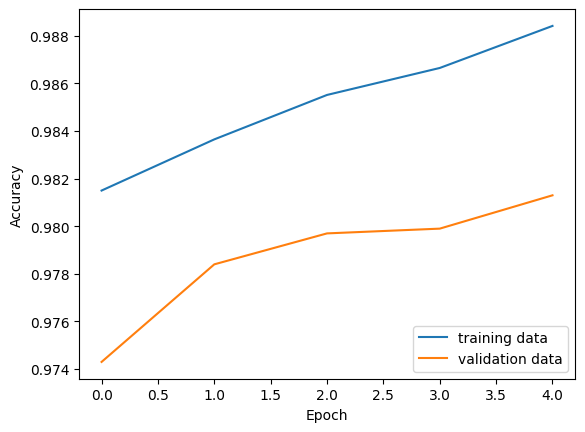

In [17]:
plt.plot(histroy.history["accuracy"])
plt.plot(histroy.history["val_accuracy"])
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["training data", "validation data"], loc='lower right')
plt.show()

In [18]:
val_loss, val_acc = model.evaluate(x_val,y_val)
print("validation set accuracy: ", val_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0634 - accuracy: 0.9813
validation set accuracy:  0.9812999963760376


###Prediction###

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


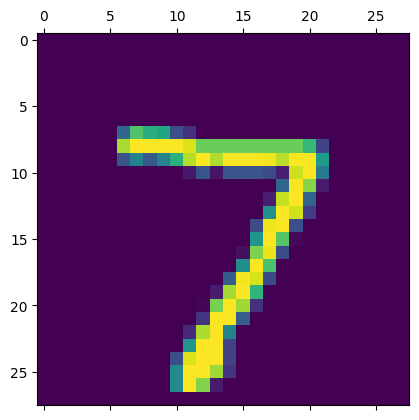

In [19]:
print(y_val[0])
plt.matshow(x_val[0,:,:,0])
plt.show()

In [20]:
prediction = model.predict(x_val)
print(prediction[0]) # to print the probability of the categories

313/313 [==============================] - 1s 2ms/step
[6.6134350e-15 3.2830794e-08 9.2688274e-10 3.6529596e-05 8.7654592e-11
 4.9559312e-10 6.4244617e-20 9.9992406e-01 4.0072261e-09 3.9310093e-05]


In [21]:
print(prediction[0].round())

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


###Things can be done for enhancing performance###
* Use GPU
* increase epochs (be care of overfitting -> early stopping)
* Add more features detectors (more params need to be trained)
* Add more layers (mind the exploding and vanishing for the sensitivity function of BP -> ResNet maybe a better choice)
* Add more Cov Layer (may also include pooling layer to increase the computing)
* The model already > baseline acc (1/10)